In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

x =[]
y =[]
with open("/content/drive/MyDrive/datasets/data_multivar.txt",'r') as f:
  for line in f.readlines():
    data = [float(i) for i in line.split(',')]
    x.append(data[0])
    y.append(data[1])
x = np.array(x)
y = np.array(y)

data = list(zip(x,y))
data = [list(i) for i in data]
data = np.array(data)

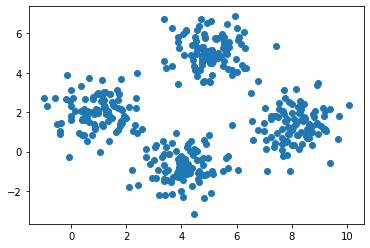

In [20]:
plt.scatter(data[:,0],data[:,1],marker='o')

### Building a model

In [29]:
kmeans = KMeans(init='k-means++',n_clusters=4,n_init=10)
kmeans.fit(data)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

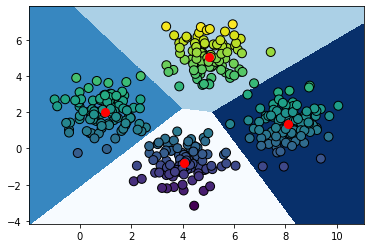

In [36]:
stepsize = 0.01

xmin,xmax = min(data[:,0])-1.0,max(data[:,0])+1.0
ymin,ymax = min(data[:,1])-1.0,max(data[:,1])+1.0
xdata,ydata = np.meshgrid(np.arange(xmin,xmax,0.01),np.arange(ymin,ymax,0.01))
mesh_output = kmeans.predict(np.c_[xdata.ravel(),ydata.ravel()])
mesh_output = mesh_output.reshape(xdata.shape)
plt.pcolormesh(xdata,ydata,mesh_output,cmap=plt.cm.Blues)
plt.scatter(data[:,0],data[:,1],linewidths=1,c=y,s=80,edgecolors='black')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],color='r',facecolor='red',linewidths=3,zorder=10)
